In [14]:
import os
import pathlib
import cv2
import numpy as np
from pprint import pprint

import matplotlib.pyplot as plt

In [12]:
def getSuffixPath(suffix, Recursive=False): # 獲取dir目錄下所有後輟為suffix的文件
    paths_dict = {}
    
    suffix = tuple([suffix]) if type(suffix) is str else tuple(suffix)
    _suffix = tuple(map(str.lower, suffix)) # 後輟轉成小寫
    
    _suffix = tuple(map(lambda x:'*.'+x if x[0] != '.' else '*'+x, _suffix)) # 檢查副檔名"."號
    if Recursive:
        _suffix = tuple(map(lambda x:'**'+os.sep+x, _suffix)) # 檢查副檔名"."號

    for _suff, suff in zip(_suffix, suffix):
        paths_dict[suff] = [str(_.resolve()) for _ in pathlib.Path('.').glob(_suff)]
#         [print(_dir+'/'+str(_)) for _ in pathlib.Path(_dir).glob(_suff)]

    return paths_dict

In [19]:
print('導入資料')
file_type = ('png', 'jpg', 'jpeg')
file_type = tuple(map(lambda x:'*.'+x if x[0] != '.' else '*'+x, file_type)) # 檢查副檔名"."號
paths = [str(p.resolve()) for _suff in file_type for p in pathlib.Path('.').glob(_suff)]
print('找到檔案:')
pprint(paths)

導入資料
找到檔案:
['C:\\Project\\test\\test.png', 'C:\\Project\\test\\123.jpg']


(659, 223)
(2048, 693)
(643, 226)
(2048, 720)
done!


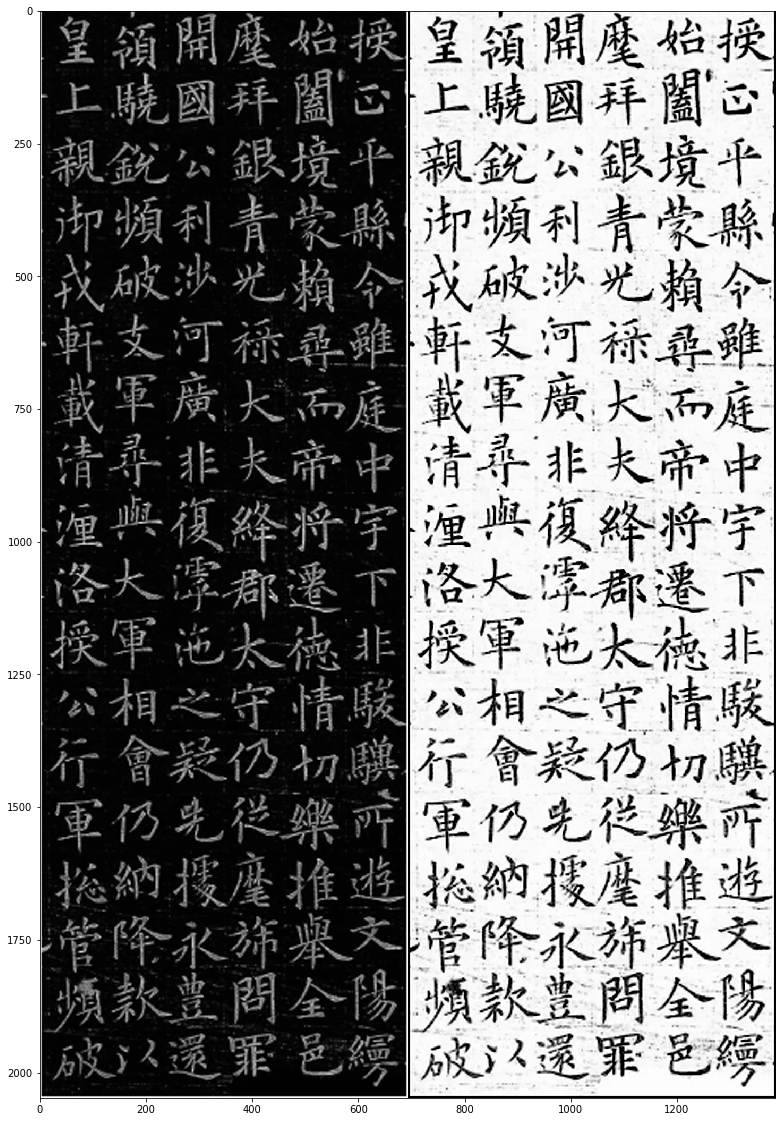

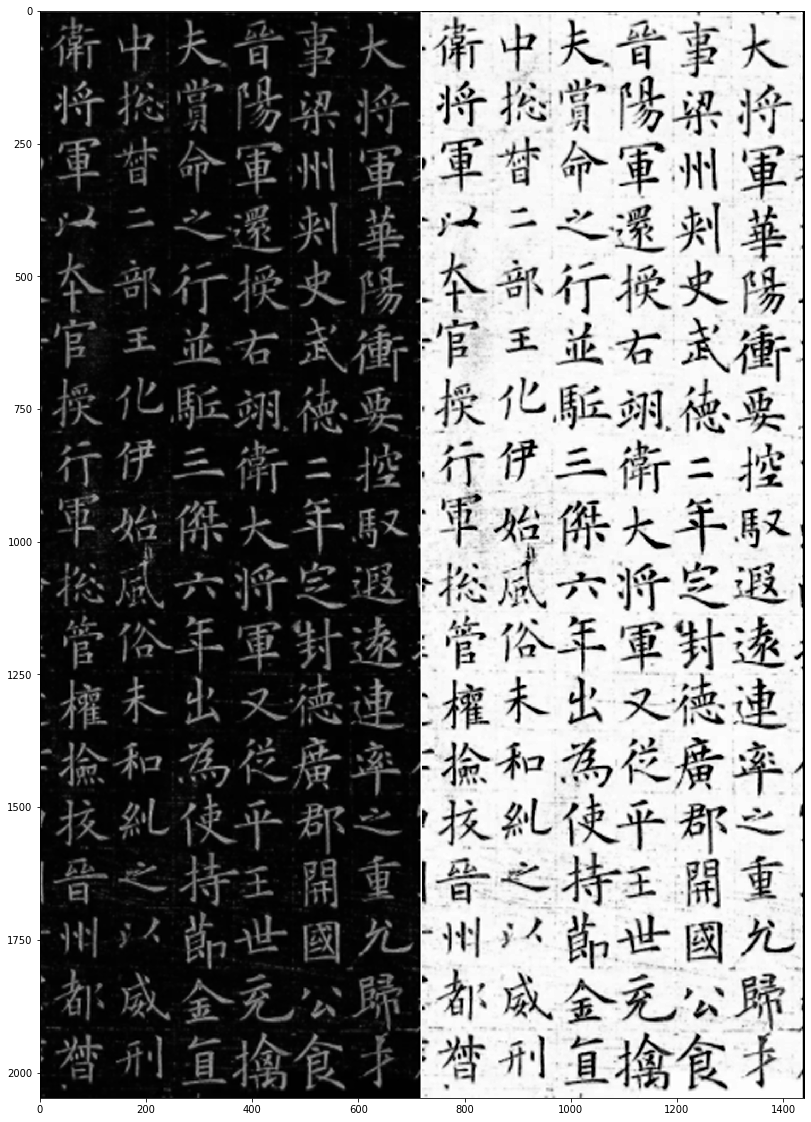

In [79]:
for path in paths:
    gray = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
#     cv2.imshow('img', img)
    img_shape = gray.shape  # 图像大小(h, w, 3)
    print('原始圖片大小:', img_shape)
    h = img_shape[0]
    w = img_shape[1]
    if h>w:
        fx = 2048/h
        gray = cv2.resize(gray, None, fx=fx, fy=fx, interpolation=cv2.INTER_CUBIC)
    else:
        fy = 2048/w
        gray = cv2.resize(gray, None, fx=fy, fy=fy, interpolation=cv2.INTER_CUBIC)
    print('圖片大小:', gray.shape)
    dst = gray.copy()
    
    # 線性轉換
    a = 2
    dst = dst * float(a)
    dst[dst > 255] = 255
    dst = np.round(dst)
    dst = dst.astype(np.uint8)
    dst = 255 - dst # 最大图像灰度值减去原图像，即可得到反转的图像
    (filename,extension) = os.path.splitext(path)
#     plt.figure(figsize = (200,20))
#     plt.imshow(np.hstack((gray, dst)), cmap='gray')
    cv2.imwrite(filename+'_reversed'+extension, dst)

print('done!')
print("等待確認~~", end="")
input()